# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [82]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [83]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [84]:
#  1. Get the total rides for each city type

#First, create DataFrames for each city type
urban_cities_df = pyber_data_df[pyber_data_df['type'] == 'Urban']
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

#Then count how many rides per individual city
urban_ride_count = urban_cities_df.groupby(['city']).count()['ride_id']
suburban_ride_count = suburban_cities_df.groupby(['city']).count()['ride_id']
rural_ride_count = rural_cities_df.groupby(['city']).count()['ride_id']

#Add up all rides per city type
ur = urban_ride_count.sum()
sr = suburban_ride_count.sum() 
rr = rural_ride_count.sum()
ur, sr, rr

(1625, 625, 125)

In [85]:
# 2. Get the total drivers for each city type
urban_driver_count = urban_cities_df.groupby(['city']).mean()['driver_count']
suburban_driver_count = suburban_cities_df.groupby(['city']).mean()['driver_count']
rural_driver_count = rural_cities_df.groupby(['city']).mean()['driver_count']

ud = urban_driver_count.sum()
sd = suburban_driver_count.sum()
rd = rural_driver_count.sum()
ud,sd,rd

(2405.0, 490.0, 78.0)

In [86]:
#  3. Get the total amount of fares for each city type

#First, get the total number of fares per individual city
urban_city_fare = urban_cities_df.groupby(['city']).sum()['fare']
suburban_city_fare = suburban_cities_df.groupby(['city']).sum()['fare']
rural_city_fare = rural_cities_df.groupby(['city']).sum()['fare']

#Then add up all the fares per city type
uf = round(urban_city_fare.sum(),2)
sf = suburban_city_fare.sum()
rf = rural_city_fare.sum()

uf,sf,rf

(39854.38, 19356.33, 4327.93)

In [87]:
#  4. Get the average fare per ride for each city type.
aru = round(uf/ur,2)
ars = round(sf/sr,2)
arr = round(rf/rr,2)

print(f"Average urban fare per ride is {aru}")
print(f"Average suburban fare per ride is {ars}")
print(f"Average rural fare per ride is {arr}")                                           

Average urban fare per ride is 24.53
Average suburban fare per ride is 30.97
Average rural fare per ride is 34.62


In [88]:
# 5. Get the average fare per driver for each city type.
adu = round(uf/ud,2)
ads = round(sf/sd,2)
adr = round(rf/rd,2)

print(f"Average urban fare per driver is {adu}")
print(f"Average suburban fare per driver is {ads}")
print(f"Average rural fare per driver is {adr}")

Average urban fare per driver is 16.57
Average suburban fare per driver is 39.5
Average rural fare per driver is 55.49


In [89]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({
        "type":["Rural","Suburban","Urban"],
        "Total Rides":[rr, sr, ur],
        "Total Drivers":[rd, sd, ud],
        "Total Fares":[rf, sf, uf],
        "Average Fare Per Ride": [arr, ars, aru],
        "Average Fare Per Driver": [adr, ads, adu]
})

pyber_summary_df

,type,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
0,Rural,125,78.0,4327.93,34.62,55.49
1,Suburban,625,490.0,19356.33,30.97,39.50
2,Urban,1625,2405.0,39854.38,24.53,16.57


In [90]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [91]:
#  8. Format the columns.
pyber_summary_df

,type,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
0,Rural,125,78.0,4327.93,34.62,55.49
1,Suburban,625,490.0,19356.33,30.97,39.50
2,Urban,1625,2405.0,39854.38,24.53,16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [92]:
# 1. Read the merged DataFrame
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [93]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
total_fare_df = pyber_data_df.groupby(['type','date']).sum()[['fare']]

total_fare_df.head()

fare
type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33

In [94]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
total_fare_df = total_fare_df.reset_index()

total_fare_df

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [95]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
total_fare_pivot = total_fare_df.pivot(index='date',columns='type', values='fare')
#sample_df.head(25)
total_fare_pivot.head(25)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [96]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
#total_fare_pivot.columns.name = 0
#total_fare_pivot = total_fare_pivot.reset_index()
Threemonth_pivot_df = total_fare_pivot.loc['2019-01-01':'2019-04-29']
Threemonth_pivot_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [97]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
Threemonth_pivot_df.index = pd.to_datetime(Threemonth_pivot_df.index)

Threemonth_pivot_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [98]:
# 7. Check that the datatype for the index is datetime using df.info()
Threemonth_pivot_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [99]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_fares_df = Threemonth_pivot_df.resample('W').sum()
weekly_fares_df.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


<AxesSubplot:title={'center':'Total Fare by City Type'}, xlabel='DATES', ylabel='Weekly Fare(USD)'>

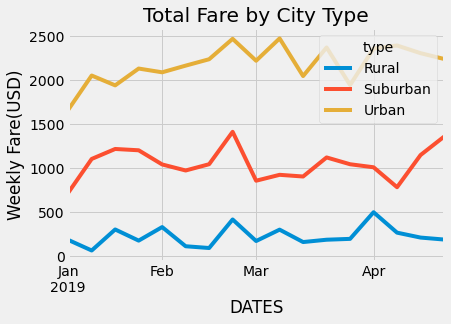

In [104]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
import matplotlib.pyplot as plt
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
weekly_fares_df.plot(xlabel='DATES',ylabel='Weekly Fare(USD)',title='Total Fare by City Type')